In [ ]:
import zipfile
import os

# Ruta al archivo zip
ruta_zip = '/content/drive/My Drive/Colab_Notebooks/Sohas_weapon-Classification.zip'  # Asegúrate de cambiar el nombre del archivo según corresponda

# Ruta donde deseas extraer los archivos
directorio_destino = '/content/drive/My Drive/Colab_Notebooks/Armas'  # Ajusta según tus necesidades

# Extraer el contenido del archivo zip
with zipfile.ZipFile(ruta_zip, 'r') as zip_ref:
    zip_ref.extractall(directorio_destino)

# Listar los archivos extraídos
archivos_extraidos = os.listdir(directorio_destino)
print("Archivos extraídos:", archivos_extraidos)

Archivos extraídos: ['Sohas_weapon-Classification']


# Nueva sección

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Ruta al directorio que contiene las subcarpetas (clases) / DATASET
directorio_principal = '/content/drive/My Drive/Colab_Notebooks/Armas/Sohas_weapon-Classification'

# Cambiar al directorio principal
os.chdir(directorio_principal)

# Lista para almacenar las imágenes y las etiquetas
imagenes = []
etiquetas = []

# Lista de nombres de las etiquetas
nombres_etiquetas = os.listdir(directorio_principal)

# Recorrer las subcarpetas (clases)
for etiqueta, nombre_etiqueta in enumerate(nombres_etiquetas):
    carpeta_etiqueta = os.path.join(directorio_principal, nombre_etiqueta)

    # Obtener la lista de archivos en la subcarpeta
    archivos_imagenes = os.listdir(carpeta_etiqueta)

    # Recorrer los archivos en la subcarpeta
    for archivo in archivos_imagenes:
        # Comprobar si el archivo es una imagen (ajustar según el formato de tus imágenes)
        if archivo.endswith(('.jpg', '.jpeg', '.png')):
            # Construir la ruta completa de la imagen
            ruta_imagen = os.path.join(carpeta_etiqueta, archivo)

            # Cargar la imagen y redimensionar usando TensorFlow
            imagen = tf.keras.preprocessing.image.load_img(ruta_imagen, color_mode='grayscale', target_size=(28, 28))
            imagen_array = tf.keras.preprocessing.image.img_to_array(imagen)

            # Añadir la imagen y la etiqueta a las listas
            imagenes.append(imagen_array)
            etiquetas.append(etiqueta)

# Convertir las listas a numpy arrays
datos_np = np.array(imagenes)
etiquetas_np = np.array(etiquetas)

# Imprimir las formas de los arrays
print("Forma de los datos:", datos_np.shape)
print("Forma de las etiquetas:", etiquetas_np.shape)

# Convertir las etiquetas a un tensor de forma (batch_size,)
etiquetas_np = etiquetas_np.reshape(-1)

# Imprimir las formas actualizadas
print("Forma de los datos:", datos_np.shape)
print("Forma de las etiquetas:", etiquetas_np.shape)


Forma de los datos: (9544, 28, 28, 1)
Forma de las etiquetas: (9544,)
Forma de los datos: (9544, 28, 28, 1)
Forma de las etiquetas: (9544,)


In [ ]:
print("Nombres de las etiquetas:")
for etiqueta in nombres_etiquetas:
    print(etiqueta)

Nombres de las etiquetas:
billete
knife
monedero
pistol
smartphone
tarjeta


In [ ]:
from sklearn.model_selection import train_test_split

# Convertir las listas a numpy arrays
datos_np = np.array(imagenes)
etiquetas_np = np.array(etiquetas)

# Dividir los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
datos_entrenamiento, datos_pruebas, etiquetas_entrenamiento, etiquetas_pruebas = train_test_split(
    datos_np, etiquetas_np, test_size=0.2, random_state=42)

# Imprimir las formas de los conjuntos de datos
print("Forma de datos_entrenamiento:", datos_entrenamiento.shape)
print("Forma de etiquetas_entrenamiento:", etiquetas_entrenamiento.shape)
print("Forma de datos_pruebas:", datos_pruebas.shape)
print("Forma de etiquetas_pruebas:", etiquetas_pruebas.shape)

# Ahora, puedes definir tus variables para usar en el modelo
imagenes_entrenamiento = datos_entrenamiento
etiquetas_entrenamiento = etiquetas_entrenamiento
imagenes_pruebas = datos_pruebas
etiquetas_pruebas = etiquetas_pruebas

Forma de datos_entrenamiento: (7635, 28, 28, 1)
Forma de etiquetas_entrenamiento: (7635,)
Forma de datos_pruebas: (1909, 28, 28, 1)
Forma de etiquetas_pruebas: (1909,)


In [ ]:
import numpy as np
# Funcion de normalizacion para los datos (Pasar de 0-255 a 0-1)
# Hace que la red aprenda mejor y más rápido
def normalizar(imagenes, etiquetas):
    imagenes = imagenes.astype(np.float32)
    imagenes /= 255  # Aquí lo pasa de 0-255 a 0-1
    return imagenes, etiquetas

# Normalizar los datos de entrenamiento y pruebas con la función que hicimos
datos_entrenamiento = normalizar(datos_entrenamiento[0], datos_entrenamiento[1])
datos_pruebas = normalizar(datos_pruebas[0], datos_pruebas[1])

# Convertir los datos normalizados a conjuntos de datos de TensorFlow
datos_entrenamiento_tf = tf.data.Dataset.from_tensor_slices(datos_entrenamiento)
datos_pruebas_tf = tf.data.Dataset.from_tensor_slices(datos_pruebas)

# Agregar a la caché (usar memoria en lugar de disco, entrenamiento más rápido)
datos_entrenamiento_tf = datos_entrenamiento_tf.cache()
datos_pruebas_tf = datos_pruebas_tf.cache()

Forma original de la imagen: (28, 1)


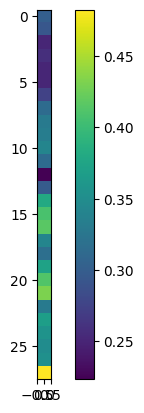

In [ ]:
import matplotlib.pyplot as plt

# Mostrar una imagen de los datos de prueba
for imagen, etiqueta in datos_pruebas_tf.take(1):
    break

# Convierte la imagen a NumPy
imagen_np = imagen.numpy()

# Imprimir la forma original de la imagen
print("Forma original de la imagen:", imagen_np.shape)

# Dibujar
plt.figure()
plt.imshow(imagen_np, cmap='viridis')
plt.colorbar()
plt.grid(False)
plt.show()



In [ ]:
#Crear el modelo
modelo = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28,1)), #1 - blanco y negro
  tf.keras.layers.Dense(50, activation=tf.nn.relu),
  tf.keras.layers.Dense(50, activation=tf.nn.relu),
  tf.keras.layers.Dense(6, activation=tf.nn.softmax) #Para redes de clasificacion
])

In [ ]:
#Compilar el modelo
modelo.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [ ]:
# Definir el tamaño del lote
TAMANO_LOTE = 32

# Obtener el total de ejemplos en el conjunto de datos de entrenamiento
total_ejemplos_entrenamiento = len(imagenes_entrenamiento)

# Convertir la tupla a un conjunto de datos de TensorFlow para entrenamiento
datos_entrenamiento = tf.data.Dataset.from_tensor_slices((imagenes_entrenamiento, etiquetas_entrenamiento))

# Mezclar y repetir datos de entrenamiento
datos_entrenamiento = datos_entrenamiento.repeat().shuffle(total_ejemplos_entrenamiento).batch(TAMANO_LOTE)

# Convertir la tupla a un conjunto de datos de TensorFlow para prueba
datos_pruebas = tf.data.Dataset.from_tensor_slices((imagenes_pruebas, etiquetas_pruebas))

# Agrupar datos de prueba en lotes
datos_pruebas = datos_pruebas.batch(TAMANO_LOTE)

In [ ]:
import math
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Calcular el número total de ejemplos de entrenamiento
num_ej_entrenamiento = len(imagenes_entrenamiento)

# Configurar el generador de datos de validación
val_datagen = ImageDataGenerator()
val_generator = val_datagen.flow(datos_pruebas, etiquetas_pruebas, batch_size=TAMANO_LOTE)

# Entrenar el modelo
historial = modelo.fit(
    datos_entrenamiento,
    etiquetas_entrenamiento,
    epochs=50,
    steps_per_epoch=math.ceil(num_ej_entrenamiento/TAMANO_LOTE),
    validation_data=val_generator  # Agregar esta línea para habilitar la métrica de validación
)


Epoch 1/50
239/239 [==============================] - 9s 38ms/step - loss: 0.8762 - accuracy: 0.6896 - val_loss: 0.8498 - val_accuracy: 0.6988
Epoch 2/50
239/239 [==============================] - 7s 29ms/step - loss: 0.7784 - accuracy: 0.7269 - val_loss: 0.7859 - val_accuracy: 0.7218
Epoch 3/50
239/239 [==============================] - 5s 22ms/step - loss: 0.7176 - accuracy: 0.7505 - val_loss: 0.7848 - val_accuracy: 0.7192
Epoch 4/50
239/239 [==============================] - 7s 28ms/step - loss: 0.6541 - accuracy: 0.7707 - val_loss: 0.8328 - val_accuracy: 0.7103
Epoch 5/50
239/239 [==============================] - 5s 22ms/step - loss: 0.5902 - accuracy: 0.7978 - val_loss: 0.7811 - val_accuracy: 0.7197
Epoch 6/50
239/239 [==============================] - 6s 25ms/step - loss: 0.5320 - accuracy: 0.8231 - val_loss: 0.7648 - val_accuracy: 0.7276
Epoch 7/50
239/239 [==============================] - 6s 26ms/step - loss: 0.4767 - accuracy: 0.8384 - val_loss: 0.7549 - val_accuracy: 0.7365

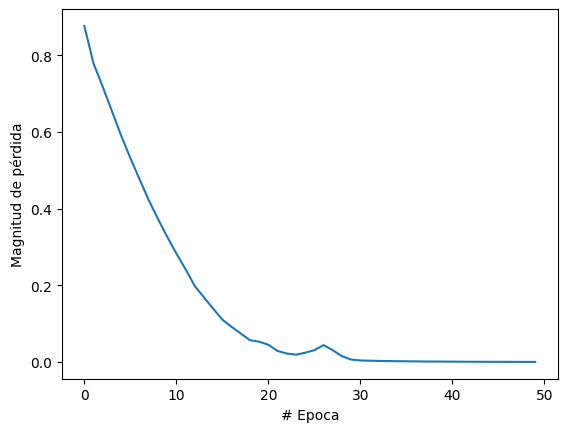

In [ ]:
#Ver la funcion de perdida
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

In [ ]:
# Resumen de pérdida y precisión
print("\nResumen del entrenamiento:")
print("Pérdida final:", historial.history['loss'][-1])
print("Precisión final:", historial.history['accuracy'][-1])
print("\nResumen de la validación:")
print("Pérdida final:", historial.history['val_loss'][-1])
print("Precisión final:", historial.history['val_accuracy'][-1])


Resumen del entrenamiento:
Pérdida final: 0.00029190475470386446
Precisión final: 1.0

Resumen de la validación:
Pérdida final: 1.9924538135528564
Precisión final: 0.7485594749450684


299/299 [==============================] - 2s 7ms/step
Informe de clasificación:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       777
           1       0.96      0.97      0.97      2349
           2       0.91      0.91      0.91       813
           3       0.96      0.97      0.97      3975
           4       0.94      0.90      0.92      1184
           5       0.90      0.86      0.88       446

    accuracy                           0.95      9544
   macro avg       0.93      0.92      0.93      9544
weighted avg       0.95      0.95      0.95      9544



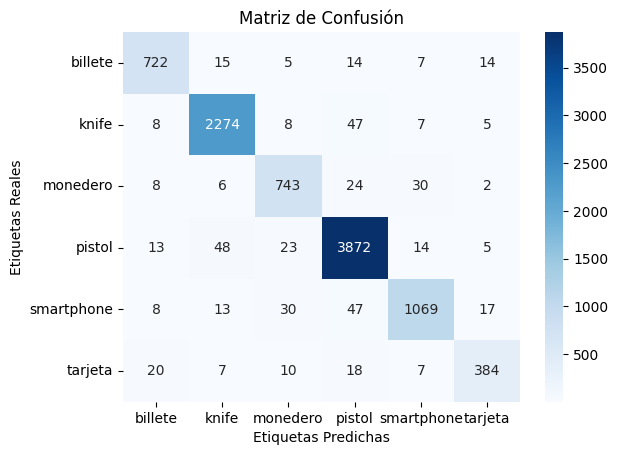

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Definir algunos parámetros importantes
width_shape = 28  # Ajustado al tamaño de las imágenes de entrada
height_shape = 28  # Ajustado al tamaño de las imágenes de entrada
num_classes = 6  # Número de clases que has proporcionado
epochs = 50
batch_size = 32
class_names = ['billete', 'knife', 'monedero', 'pistol', 'smartphone', 'tarjeta']

# Redimensionar las imágenes para que coincidan con el modelo CNN
datos_np_resized = np.array([tf.image.resize(im, (width_shape, height_shape)).numpy() for im in datos_np])

# Normalizar los valores de píxeles al rango [0, 1]
datos_np_resized = datos_np_resized / 255.0

# Hacer predicciones en los datos de validación
predicciones = modelo.predict(datos_np_resized)
etiquetas_predichas = np.argmax(predicciones, axis=1)

# Imprimir informe de clasificación
print("Informe de clasificación:")
print(classification_report(etiquetas_np, etiquetas_predichas))

# Calcular y visualizar la matriz de confusión
matriz_confusion = confusion_matrix(etiquetas_np, etiquetas_predichas)
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Reales')
plt.title('Matriz de Confusión')
plt.show()